In [ ]:
# 페이지 53부터 

# Function Definition 
- 함수 : 명령을 수행하는 일종의 기능 단위 
- 코드를 논리적으로 분리, 캡슐화 용도 
- 필요한 경우 반복적으로 호출 
- return 명령어가 없는 경우 None을 반환한다. 
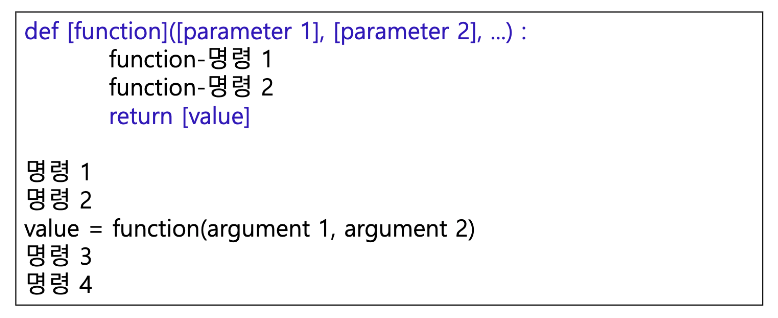

## Function Definition Example
- 사각형의 넓이를 구하는 함수 

In [1]:
def rectangle_area(x, y):
    return x * y 

row = 10
col = 100

print(rectangle_area(row, col))
print(rectangle_area(20, 1.5))

1000
30.0


## Notion for Function Parameter 
- 인자로 받은 값을 바로 수정하는 것은 권장하지 않음 
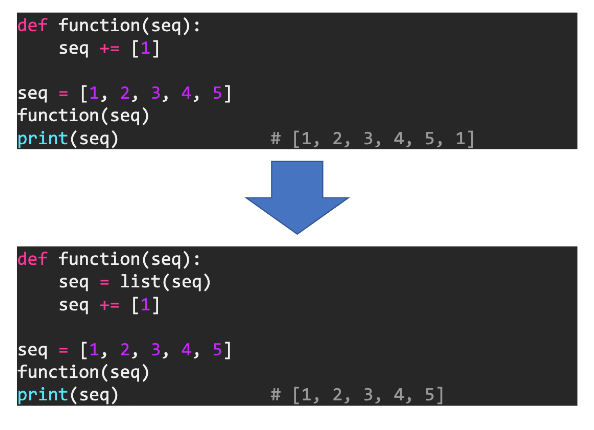

## Variable Scope 
- 파이썬에서는 상위에 정의된 변수는 언제나 참조 가능하다 
- 함수 내 정의된 변수 이름은 그 함수 내에서만 유효하다 
- Global
    - 최상위에 선언
    - 다른 파일에서 접근 가능 
- Local
    - 함수 안에 선언
    - 상위함수에서는 접근 불가 

In [4]:
var1 = 10 
var2 = 20 

def function(var2): #var2이 fuction함수 내에서 재정의
    var2 += 1 # 상위 var2와 다름 , 20+1 
    print(var1 + var2) # 상위변수 var1읽기 가능 10+21 
    
function(var2) # 10, 21 
print(var2) # 20

31
20


In [5]:
var1 = 1 # Global variable

def main(): # global function
    var2 = 10 # local variable
    
    def function(): # local function
        var3 = 100 # local function 
        print(var1, var2, var3) # 1, 10, 100
        
    function()
    print(var1, var2) # 1, 10 
    
main()
print(var1) # 1

1 10 100
1 10
1


## Global & Nonlocal 
- 상위 변수 재정의 선언 
- 함수 맨 앞에 선언한다 
    - global :  최상위 변수
    - nonlocal : 바로 상위 변수 
- 스파게티 코드의 주 원인 --> 사용하지 않는 것을 권장 

In [7]:
var = 1

def main():
    var = 10
    
    def function1():
        global var # 최상위 변수 재정의 선언
        var += 1 # 10+1 
        
    def function2():
        nonlocal var # 직상위 변수재정의 선언
        var += 1 # 1+1
        
    function1()
    function2()
    print('-',var) 
    
main()
print('=',var) # 1

- 11
= 2


Q. 위에 코드 다시 이해해보자 

## variable Capture? 
- 함수형 언어에서 쓰이는 캡쳐와 다름 
- 상위 값이 바뀌면 하위 값이 바뀝 
- 즉, 클로져가 아님


- 프로그램을 스파게티로 만드는 주요 원인     
1) 상위 객체엔 가능하면 접근하지 않기    
2) 되는대로 모두 파라미터로 받자    
3) 최상위 선언도 가급적 지양    

- Q. 클로저란?
- Q. 함수에서 쓰이는 캡처, 개발용어 캡처? 

In [8]:
var = 1 

def function():
    print(var) # 2
    
var += 1 # 2
function() # 2

2


In [12]:
def function(var):
    print(var)
    var += 1 # 이건 뭐 용도에 따라서 
    
function(1)
print(var)

1
2


## How to make Closure? 
- 파이썬에서 클로저는 Factory형식으로 사용
- 파이썬에서 함수도 일반 객체(일급객체)이다. 
- 변수로 할당 가능 ⇒ Argument & return 가능 

In [13]:
number = 10 
def print_closure_factory(number): # closure function factory
    def print_closure(): # closure 함수 
        print(number) # factory변수를 사용 ⇒ closure마다 고유한 변수 
        
    return print_closure # 만들어진 closure를 반환

print_5 = print_closure_factory(5)
print_10 = print_closure_factory(10)

number += 10 # 10+10 ,number  값이 변해도 영향을 안미친

print_5()
print_10()

5
10


- Q. number 값이 변해도 영향을 안 미친다는 건가? 


## Closure Example

In [14]:
def add(var):
    return var + 2 

def multiply(var):
    return var * 2 

def factory(function, n):
    def closure(var):
        for _ in range(n):
            var = function(var)
        return var 
    
    return closure

print(factory(add,4)(10)) # 10 , 12, 14, 16, 18 
print(factory(multiply,4)(3)) # 3 , 6, 12, 24, 48

18
48


Q. 왜 이렇게 돌아간거지? 10이, 3이 어디서 들어간거지 ? 

## Decorator
- 꾸밈자
- 함수 하나를 인자로 받아 같은 형태의 함수를 반환하는 함수 
- @을 사용하여 함수를 꾸미는데 사용가능 
- class를 사용할 시 decorator 에 인자 추가가 가능 
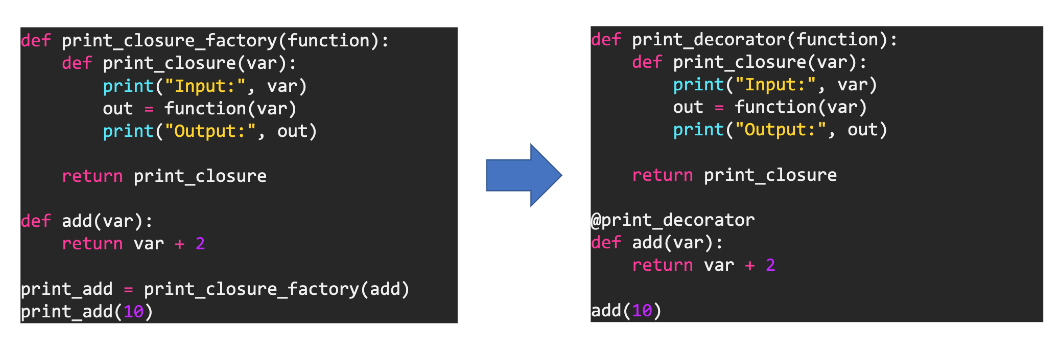

## Decorator with Argument 
- 데코레이터에 인자를 추가하기 이해선 함수를 한번 더 Wrapping 필요 

In [16]:
def times_decorator_factory(times) : # 인자를 받아 데코레이터를 만듦
    def times_decorator(function): # 함수를 받아 꾸밈
        def closure(var): # 꾸며진 함수 
            for _ in range(times): 
                var = function(var)
            return var 
        return closure
    return times_decorator

@times_decorator_factory(5) # 데코레이터에 인자 추가 
def add(number):
    return number + 2 

print(add(5))

15


Q. 구조를 이해해보자. 그리고 확인해보자 

##  Appropriate Decorating 
- 함수를 wrapping하기 때문에 기존 함수에 접근 불가 
- docstring, 함수 이름 등 기존 함수의 특정을 가져올 필요가 있다.
- functools 라이브러리의 wraps 데코레이터를 사용한다. 
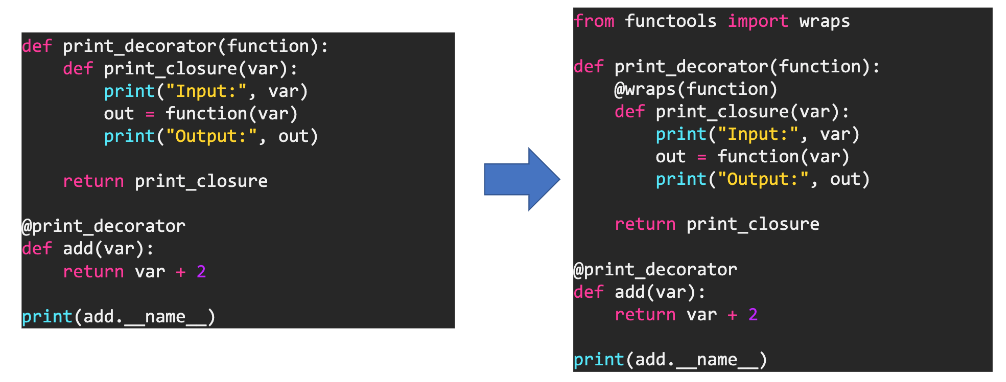

# Recursive Function(재귀함수)
- 자기 자신을 호출하여 반복적으로 수행
- 수학의 점화식과 동일
- 재귀 함수와 반복문은 수학적으로 동치(서로 변환 가능)

In [17]:
def factorial(n):
    if n == 1 :
        return 1 
    return n * factorial(n - 1)

print(factorial(5))

120


## Function Parameters 
- 인자를 명시적으로 대입 가능 
- 인자 기본값을 설정 가능 
- 기본값이 설정된 인자는 맨 뒤에 붙여서 써야만 함 

In [18]:
# 인자를 명시적으로 대입 가능 
def function(var1, var2):
    print(var1, var2)
    
function(var2=20, var1=10) # (10,20)

10 20


In [21]:
# 인자 기본 값을 설정 가능
def function(var1, var2=20):
    print(var1, var2)
    
function(10) # 10, 20
function(10, 15) # 10,15

10 20
10 15


In [22]:
# 기본 값이 설정된 인자는 맨 뒤에 붙여 써야함 
def function(var1, var2=20, var3):
    print(var1, var2, var3)

SyntaxError: non-default argument follows default argument (<ipython-input-22-583c518df11d>, line 2)

## Variable Length Parameter 
- 인자 개수가 정해져 있지 않다면?
- \* 아스터리스크를 사용하여 남은 여러 인자를 패킹 가능 
- 가변 인자는 맨 마지막에 단 한개만 위치 가능 

In [23]:
def add_all(a, b, *args): # 관습적으로 가변인자는 args를 사용 
    print(args) # (3, 4, 5)
    
    sum = 0 
    for elem in args:
        sum += elem
        
    return a + b + sum 

print(add_all(1, 2, 3, 4, 5)) #15 

(3, 4, 5)
15


## keyword Variable Length Parameter 
- 만약 명시적으로 지정된 파라미터가 남는다면? 키워드 가변인자 
- \*\* 더블 아스터리스크를 사용하여 남은 키워드 변수를 패킹한다. 
- 딕셔너리 형태로 반환
- 파라미터 순서 : 일반인자 → 기본값인자 → 가변인자 → 키워드 가변인자  

In [30]:
# 딕셔너리 형태로 반환 
def print_args(a, *args, **kwargs): 
    print(a, args, kwargs)
    
print(print_args(1, 1, 2, 3, var1=100, var2=200))

1 (1, 2, 3) {'var1': 100, 'var2': 200}
None


In [34]:
# 파라미터 순서 
def function(var1, var2=10, *args, **kwargs):
    print(var1, var2, args, kwargs)
    
function(1, 2, 3, 4, 5, var3=10)

1 2 (3, 4, 5) {'var3': 10}


## parameter unpacking 
- seqeunce에 \*을 붙이면 unpacking
- 리스트, 튜플에 적용가능
- 딕셔너리에 \*\*을 붙이면 키워드언패킹 

In [35]:
# 리스트, 튜플에 적용가능
def function(a, b, c):
    print(a, b, c)
    
l = [1, 2, 3]
function(*l)

1 2 3


In [36]:
# dictionary ** 
def function(var1, var2, **kwargs):
    print(var1, var2, kwargs)
    
d = {
    'var1':10,
    'var2':20,
    'var3':30
}
function(**d)

10 20 {'var3': 30}


## Type Hints 
- 파이썬은 동적 타이핑이다. 다소 인터페이서를 알기 어려움 
- 함수에 타입 힌트 제공이 가능
- function(변수 : 타입)의 형태 
- 그러나 딱히 타입을 안 맞춰도 에러가 나지 않는다. 
- 런타임에 타이핑을 하는 것은 동일 

In [39]:
# str, int 값을 받아 str으로 반환 
def multply_text(text:str, n:int) -> str:
    return text * n 

multply_text('hello^',5)

'hello^hello^hello^hello^hello^'